### Import / Config

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import cred_pg as c

# None = unbegrenzt
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)


In [2]:
engine = create_engine(
    f'postgresql://{c.pg_userid}:{c.pg_password}@{c.pg_host}/{c.pg_db}', 
    connect_args = {
        'options': '-c search_path=$user,ugeobln,umisc,umobility,usozmed,public', 
        'keepalives_idle': 120
    },
    pool_size=1, 
    max_overflow=0,
    execution_options={ 'isolation_level': 'AUTOCOMMIT' }
)

### Basis

In [3]:
sql = """
SELECT sales_month, kind_of_business, sales
FROM retail_sales
ORDER BY 1
;
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

sales_month                                   kind_of_business    sales
0      1992-01-01                                   Used car dealers   1744.0
1      1992-01-01            Automotive parts, acc., and tire stores   3023.0
2      1992-01-01              Furniture and home furnishings stores   3846.0
3      1992-01-01  Furniture, home furn, electronics, and applian...   7503.0
4      1992-01-01                                   Furniture stores   2392.0
...           ...                                                ...      ...
21835  2019-12-01                        Hobby, toy, and game stores   2265.0
21836  2019-12-01                                        Book stores   1037.0
21837  2019-12-01                         General merchandise stores  77648.0
21838  2019-12-01                                  Department stores  18403.0
21839  2019-12-01  Department stores(excl. discount department st...   6561.0

[21840 rows x 3 columns]

In [4]:
sql = """
select kind_of_business, count(*) as anz
FROM retail_sales
group by 1
ORDER BY 1
;
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df 

kind_of_business  anz
0                   All other gen. merchandise stores  336
1                   All other home furnishings stores  336
2          Automobile and other motor vehicle dealers  336
3                                  Automobile dealers  336
4             Automotive parts, acc., and tire stores  336
..                                                ...  ...
60  Supermarkets and other grocery (except conveni...  336
61                                   Used car dealers  336
62                            Used merchandise stores  336
63                    Warehouse clubs and superstores  336
64                            Women's clothing stores  336

[65 rows x 2 columns]

### Mit Lösung

#### 1

In [5]:
sql = """
select sales_month, sales
from retail_sales
where kind_of_business = 'Retail and food services sales, total'
order by sales_month
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

<Axes: xlabel='sales_month', ylabel='Dollar (million)'>

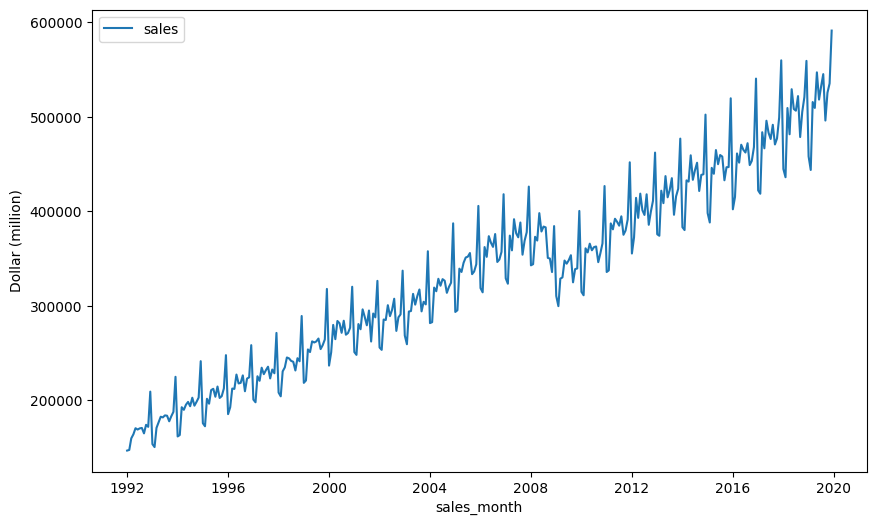

In [6]:
df.set_index('sales_month').plot(
    figsize=(10,6),
    ylabel="Dollar (million)", 
    legend=True
)

#### 2

In [7]:
sql = """
select date_part('year',sales_month) as sales_year, sum(sales) as sales
from retail_sales
where kind_of_business = 'Retail and food services sales, total'
group by 1
order by 1
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

<Axes: xlabel='sales_year', ylabel='Dollar (million)'>

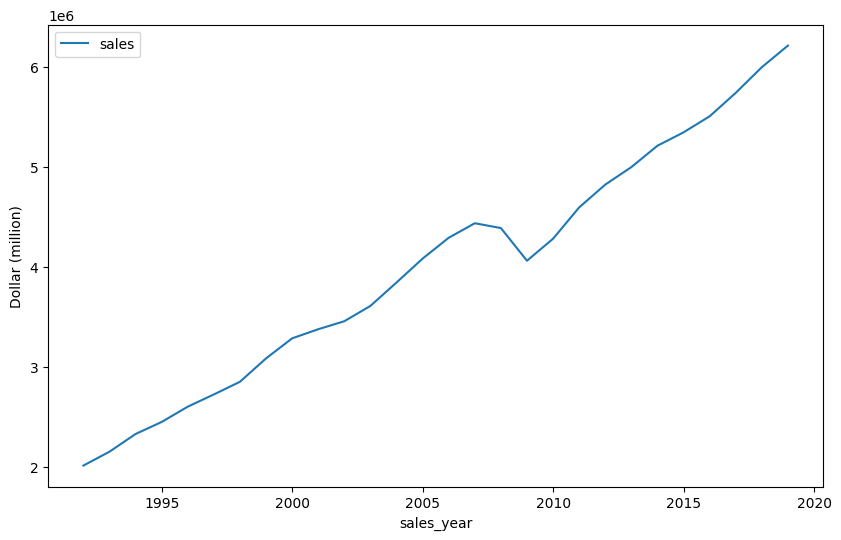

In [8]:
df.set_index('sales_year').plot(
    figsize=(10,6),
    ylabel="Dollar (million)", 
    legend=True
)

#### 3

In [9]:
sql = """
select 
  date_part('year',sales_month) as sales_year,
  kind_of_business,
  sum(sales) as sales
from retail_sales
where kind_of_business in ('Book stores','Sporting goods stores','Hobby, toy, and game stores')
group by 1,2
order by 1,2
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

<Axes: xlabel='sales_year', ylabel='sales, Dollar (million)'>

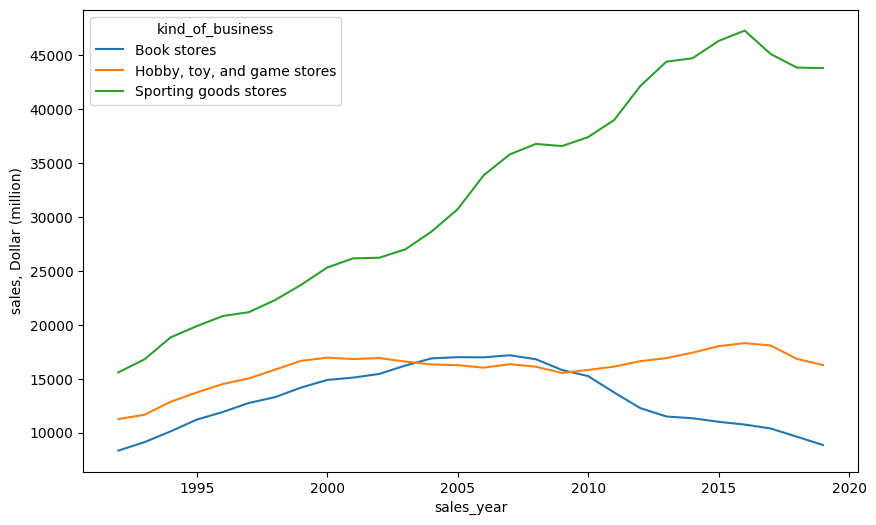

In [10]:
df.pivot(index='sales_year', columns='kind_of_business', values='sales').plot(
    figsize=(10,6),
    ylabel="sales, Dollar (million)"
)

#### 4

In [11]:
sql = """
select 
  cast(date_part('year',sales_month) as integer) as sales_year,
  kind_of_business,
  sum(sales) as sales
from retail_sales
where kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
group by 1,2
order by 1
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

<Axes: xlabel='sales_year', ylabel='sales, Dollar (million)'>

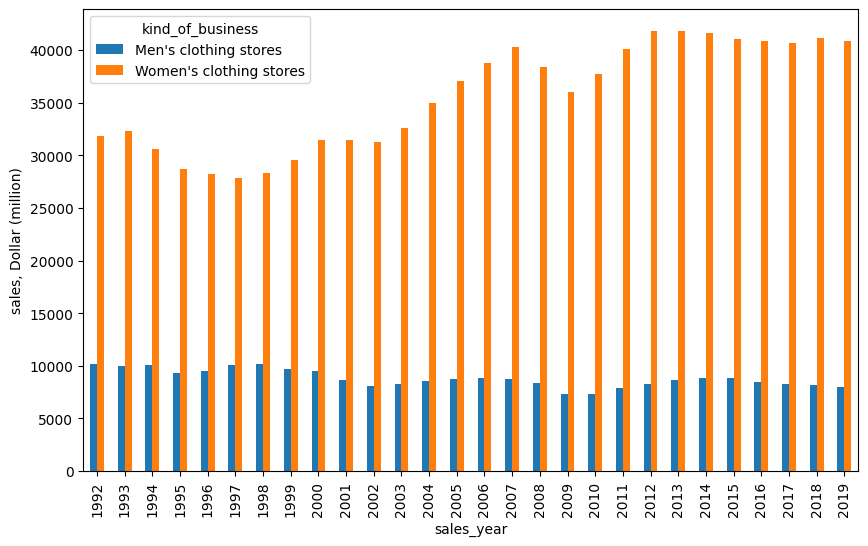

In [12]:
df.pivot(index='sales_year', columns='kind_of_business', values='sales').plot.bar(
    figsize=(10,6),
    ylabel="sales, Dollar (million)", 
)

### Ohne Lösung

#### 5

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

In [ ]:
# Visualization

#### 6

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
# df

In [ ]:
# Visualization

#### 7

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 8

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 9

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 10

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 11

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 12

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df

In [ ]:
# Visualization

#### 13

In [ ]:
sql = """
select 'dummy' as dummy
"""
with engine.connect() as con:
    df = pd.read_sql_query(text(sql), con)
df